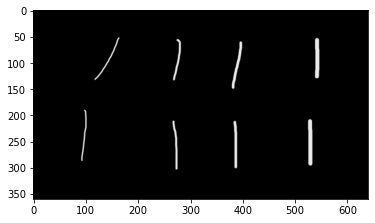

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('./lane_detection/frame.jpg')
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
mask = cv2.imread("./zeros.jpg")
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

plt.imshow(mask)

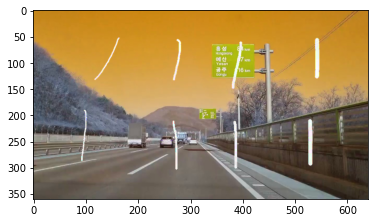

In [3]:
temp = cv2.bitwise_or(img, mask)
plt.imshow(temp)

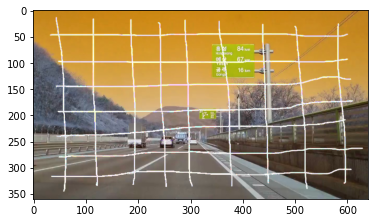

In [4]:
img = cv2.imread('./lane_detection/frame.jpg')
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)

mask = cv2.imread("./mask1.jpg")
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

temp = cv2.bitwise_or(img, mask)
plt.imshow(temp)

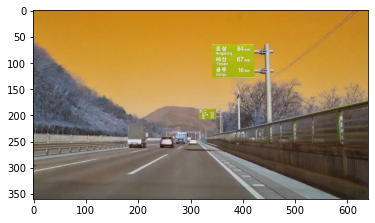

In [5]:
plt.imshow(img)

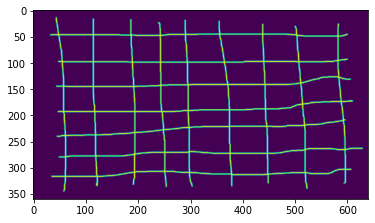

In [6]:
mask = cv2.imread("./mask1.jpg", cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)
plt.imshow(mask)

## Fast Marching Method(Alexandru Telea)

In [7]:
dst1 = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
cv2.imshow('dst',dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
mask = cv2.imread("./zeros.jpg")
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

hcon = cv2.hconcat([temp, dst1])
cv2.imshow("FastMarchingMethod", hcon)
cv2.waitKey(0)
cv2.destroyAllWindows()

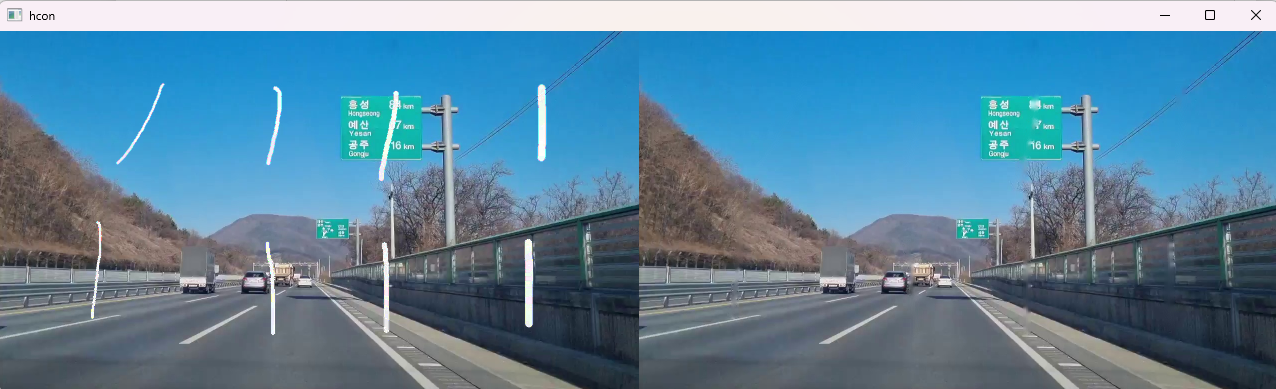

## Fluid Dynamics

In [9]:
mask = cv2.imread("./mask1.jpg", cv2.IMREAD_GRAYSCALE)
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

dst2 = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)
cv2.imshow('dst',dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
mask = cv2.imread("./zeros.jpg")
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

hcon = cv2.hconcat([temp, dst2])
cv2.imshow("Fluid Dynamics", hcon)
cv2.waitKey(0)
cv2.destroyAllWindows()

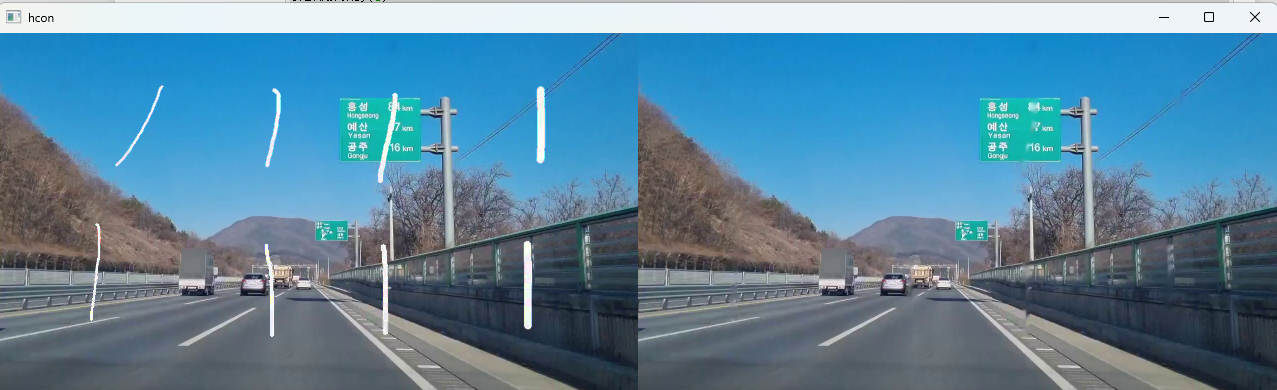

In [11]:
mask = cv2.imread("./mask1.jpg")
img = cv2.imread('./lane_detection/frame.jpg')

def inpainting(src, mask, method=cv2.INPAINT_TELEA) :
    img = cv2.bitwise_or(src, mask)
    masked = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
#     cv2.imshow("masked", img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    if method == cv2.INPAINT_NS :
        dst = cv2.inpaint(img,masked,3,cv2.INPAINT_NS)
    else :
        dst = cv2.inpaint(img,masked,3,cv2.INPAINT_TELEA)
    return dst

dst = inpainting(img, mask)

cv2.imshow("Inpainting", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
import time

In [13]:
mask = cv2.imread("./mask1.jpg")

cap = cv2.VideoCapture('./lane_detection/data/3.mp4')

while (cap.isOpened()) :
    ret, frame = cap.read()
    start = time.time()
    frame=inpainting(frame, mask)
    print(f"Inpainting computing time : {time.time()-start:.2f}s")
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.waitKey(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()
#     out.frame()

Inpainting computing time : 1.26s
Inpainting computing time : 1.20s
Inpainting computing time : 1.17s
Inpainting computing time : 1.15s
Inpainting computing time : 1.17s
Inpainting computing time : 1.15s
Inpainting computing time : 1.15s
Inpainting computing time : 1.18s
Inpainting computing time : 1.16s
Inpainting computing time : 1.17s
Inpainting computing time : 1.15s


In [14]:
# cv2.INPAINT_NS

mask = cv2.imread("./mask1.jpg")
mask = cv2.resize(mask, (0, 0), fx=0.5, fy=0.5)

cap = cv2.VideoCapture('./lane_detection/data/3.mp4')

# fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

# w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = cap.get(cv2.CAP_PROP_FPS)

# out = cv2.VideoWriter('test.mp4', fourcc, fps, (w, h))

while (cap.isOpened()) :
    ret, frame = cap.read()
    frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
    start = time.time()
    frame = inpainting(frame, mask, method=cv2.INPAINT_NS)
    
    print(f"Inpainting computing time : {time.time()-start:.2f}s")
    
    fps = 1 / (time.time() - start)
    cv2.putText(frame, f"fps : {fps:.1f}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
    cv2.imshow("frame", frame)
#     out.write(frame)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.waitKey(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
# out.release()
cv2.destroyAllWindows()

Inpainting computing time : 0.13s
Inpainting computing time : 0.13s
Inpainting computing time : 0.13s
Inpainting computing time : 0.13s
Inpainting computing time : 0.12s
Inpainting computing time : 0.12s


### 마우스로 mask 생성해서 inpaint 하는 Event

In [18]:
oldx, oldy = -1, -1
img = cv2.imread('./lane_detection/frame.jpg')
img = cv2.resize(img, (0, 0),fx=0.5,fy=0.5)
masking = np.zeros_like(img)
painter_size=10

def inpainting(src, mask, method=cv2.INPAINT_TELEA) :
    img = cv2.bitwise_or(src, mask)
    masked = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    if method == cv2.INPAINT_NS :
        dst = cv2.inpaint(img,masked,3,cv2.INPAINT_NS)
    else :
        dst = cv2.inpaint(img,masked,3,cv2.INPAINT_TELEA)
    return dst

def on_level_change(pos) :
    global img, painter_size
    painter_size = pos
    cv2.imshow("image", img)

def on_mouse(event, x, y, flags, param) :
    global oldx, oldy, painter_size
    

    
    if event == cv2.EVENT_LBUTTONDOWN : # 왼쪽 버튼 누르면 시작
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_LBUTTONUP : # 왼쪽 버튼 떼어지면 끝
        print("")
    
    elif event == cv2.EVENT_MOUSEMOVE : # 마우스 움직일 때 
        
        if flags == 1 and cv2.EVENT_FLAG_LBUTTON :
            # 마우스 움직인 좌표를 선으로 표현
            cv2.line(img, (oldx, oldy), (x, y), (255, 255, 255), painter_size, cv2.LINE_AA)
            cv2.line(masking, (oldx, oldy), (x, y), (255, 255, 255), painter_size, cv2.LINE_AA)
            
            cv2.imshow("image", img)
            oldx, oldy = x, y




cv2.namedWindow('image')
cv2.createTrackbar('paintersize', 'image', 1, 50, on_level_change)
cv2.setMouseCallback('image', on_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()


# cv2.imshow("mask", masking)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = inpainting(img, masking, method=cv2.INPAINT_NS)
hcon = cv2.hconcat([masking, img])

cv2.imwrite("mask.png", masking)
cv2.imshow("Inpainting Mask and Result", hcon)
cv2.waitKey(0)
cv2.destroyAllWindows()